In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier,export_text, plot_tree
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,recall_score,f1_score,roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
sns.set(style='whitegrid', palette='muted')
df = pd.read_csv('clean_data.csv')
df.head(3)

,Age,Duration,Frequency,Location,Intensity,Nausea,Vomit,Phonophobia,Photophobia,Visual,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Conscience,Paresthesia,DPF,Type,Type_encoded
0,30,1,5,1,2,1,0,1,1,1,...,0,0,0,0,0,0,0,0,Typical aura with migraine,5
1,50,3,5,1,3,1,1,1,1,2,...,1,0,0,0,0,0,0,0,Typical aura with migraine,5
2,53,2,1,1,2,1,1,1,1,2,...,0,0,0,0,0,0,0,0,Typical aura with migraine,5


Because the data has very standard classifications, I first conducted a classification prediction on the data to determine the specific type of migraine based on the symptoms. This predictive model holds significant importance for the clinical diagnosis of migraines.

# 2.Classification

In this section, I constructed five models to address the data classification problem.

The first three are fundamental classifiers: __Decision Tree__, __K-Nearest Neighbors (KNN)__, and __Naive Bayes__. 

Decision trees are the most fundamental classification algorithms, suitable for handling the majority of datasets and capable of effectively capturing nonlinear relationships and various types of features within the data. Given the severe class imbalance in the dataset, a single decision tree may be biased towards the majority class. To address this issue, I employed __oversampling__ techniques before model training. By generating more samples from the minority class to balance the dataset.

KNN is also a fundamental learning method, suitable for handling high-dimensional data like this dataset. However, KNN is sensitive to noise in the data and class imbalance issues. Therefore, __oversampling__ was also applied in this case to address these challenges.

Since redundancy removal has been performed in the previous data processing, the remaining features can be considered mutually independent, and Naive Bayes is also suitable for high-dimensional data. However, Naive Bayes is sensitive to imbalanced datasets, so I also performed __oversampling__.


The last two models are ensemble learning methods: __Random Forest__ and __AdaBoost__. 

Individual decision trees are prone to overfitting, especially when the dataset is small and the features are complex, as is the case with this dataset. Therefore, I adopted Random Forest as an ensemble learning method. Random Forest constructs multiple decision trees and combines their prediction results, effectively reducing the risk of overfitting associated with individual decision trees.

AdaBoost is an ensemble learning method that trains multiple weak classifiers(here, still decision tree) and combines their prediction results through weighted voting to construct a strong classifier. AdaBoost has significant advantages in handling class imbalance, as it can effectively improve the recognition accuracy of the minority class without the need for oversampling.

Finally, the models are evaluated by confusion matrices, precision, recall, F1 scores, and other metrics to select the best performing approach under the class imbalance condition.

Last but not least, I also performed a fusion of the above five models using __Logistic Regression__.

## 2.1 Model 1: Decision Tree 

In [3]:
X = df.drop(columns=['Type', 'Type_encoded'])
y = df['Type_encoded'] 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 144 to 212
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          315 non-null    int64
 1   Duration     315 non-null    int64
 2   Frequency    315 non-null    int64
 3   Location     315 non-null    int64
 4   Intensity    315 non-null    int64
 5   Nausea       315 non-null    int64
 6   Vomit        315 non-null    int64
 7   Phonophobia  315 non-null    int64
 8   Photophobia  315 non-null    int64
 9   Visual       315 non-null    int64
 10  Sensory      315 non-null    int64
 11  Dysphasia    315 non-null    int64
 12  Dysarthria   315 non-null    int64
 13  Vertigo      315 non-null    int64
 14  Tinnitus     315 non-null    int64
 15  Hypoacusis   315 non-null    int64
 16  Diplopia     315 non-null    int64
 17  Defect       315 non-null    int64
 18  Conscience   315 non-null    int64
 19  Paresthesia  315 non-null    int64
 20  DPF     

In [6]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 174 to 344
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          79 non-null     int64
 1   Duration     79 non-null     int64
 2   Frequency    79 non-null     int64
 3   Location     79 non-null     int64
 4   Intensity    79 non-null     int64
 5   Nausea       79 non-null     int64
 6   Vomit        79 non-null     int64
 7   Phonophobia  79 non-null     int64
 8   Photophobia  79 non-null     int64
 9   Visual       79 non-null     int64
 10  Sensory      79 non-null     int64
 11  Dysphasia    79 non-null     int64
 12  Dysarthria   79 non-null     int64
 13  Vertigo      79 non-null     int64
 14  Tinnitus     79 non-null     int64
 15  Hypoacusis   79 non-null     int64
 16  Diplopia     79 non-null     int64
 17  Defect       79 non-null     int64
 18  Conscience   79 non-null     int64
 19  Paresthesia  79 non-null     int64
 20  DPF      

### 2.1.1 Oversampling:SMOTE

In [7]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [8]:
X_train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          1351 non-null   int64
 1   Duration     1351 non-null   int64
 2   Frequency    1351 non-null   int64
 3   Location     1351 non-null   int64
 4   Intensity    1351 non-null   int64
 5   Nausea       1351 non-null   int64
 6   Vomit        1351 non-null   int64
 7   Phonophobia  1351 non-null   int64
 8   Photophobia  1351 non-null   int64
 9   Visual       1351 non-null   int64
 10  Sensory      1351 non-null   int64
 11  Dysphasia    1351 non-null   int64
 12  Dysarthria   1351 non-null   int64
 13  Vertigo      1351 non-null   int64
 14  Tinnitus     1351 non-null   int64
 15  Hypoacusis   1351 non-null   int64
 16  Diplopia     1351 non-null   int64
 17  Defect       1351 non-null   int64
 18  Conscience   1351 non-null   int64
 19  Paresthesia  1351 non-null   int64
 20  DPF     

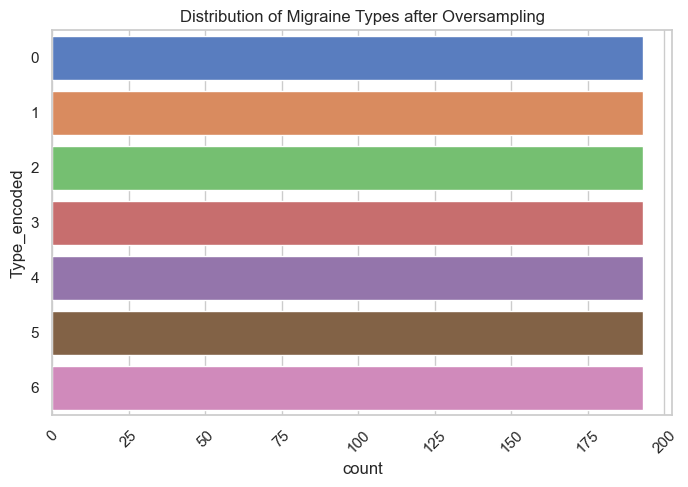

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(y=y_train_resampled)
plt.title('Distribution of Migraine Types after Oversampling')
plt.xticks(rotation=45)
plt.show()

### 2.1.2 Model Implemention(Pre-pruning + Post-pruning)

In [10]:
params = {
    'max_depth': [2, 4, 5, 6, 7, 8, 9, 10, None],
    'min_samples_split': [5, 10, 20, 50, 100, 200],
    'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05]
}

dt_model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_model, params, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)#based on accuracy
grid_search.fit(X_train_resampled, y_train_resampled)
best_params = grid_search.best_params_
grid_train_acc = grid_search.score(X_train_resampled, y_train_resampled)
grid_test_acc = grid_search.score(X_test, y_test)

print(f'Best parameters of tree: {best_params}')
print(f'Train Accuracy: {grid_train_acc: .2f}')
print(f'Test Accuracy: {grid_test_acc: .2f}')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters of tree: {'max_depth': 7, 'min_impurity_decrease': 0.01, 'min_samples_split': 5}
Train Accuracy:  0.88
Test Accuracy:  0.67


In [11]:
best_dt_model = grid_search.best_estimator_
best_dt_model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=7, min_impurity_decrease=0.01,
                       min_samples_split=5, random_state=42)

[Text(0.45588235294117646, 0.9285714285714286, 'Intensity <= 0.5\ngini = 0.857\nsamples = 1351\nvalue = [193, 193, 193, 193, 193, 193, 193]'),
 Text(0.39705882352941174, 0.7857142857142857, 'gini = 0.0\nsamples = 193\nvalue = [0, 0, 0, 0, 0, 0, 193]'),
 Text(0.5147058823529411, 0.7857142857142857, 'Phonophobia <= 0.5\ngini = 0.833\nsamples = 1158\nvalue = [193, 193, 193, 193, 193, 193, 0]'),
 Text(0.45588235294117646, 0.6428571428571429, 'gini = 0.0\nsamples = 164\nvalue = [0, 0, 0, 164, 0, 0, 0]'),
 Text(0.5735294117647058, 0.6428571428571429, 'DPF <= 0.5\ngini = 0.811\nsamples = 994\nvalue = [193, 193, 193, 29, 193, 193, 0]'),
 Text(0.3235294117647059, 0.5, 'Intensity <= 2.5\ngini = 0.746\nsamples = 613\nvalue = [109, 0, 172, 10, 193, 129, 0]'),
 Text(0.17647058823529413, 0.35714285714285715, 'Age <= 27.5\ngini = 0.496\nsamples = 274\nvalue = [27, 0, 0, 0, 181, 66, 0]'),
 Text(0.11764705882352941, 0.21428571428571427, 'Vertigo <= 0.5\ngini = 0.37\nsamples = 233\nvalue = [20, 0, 0, 0,

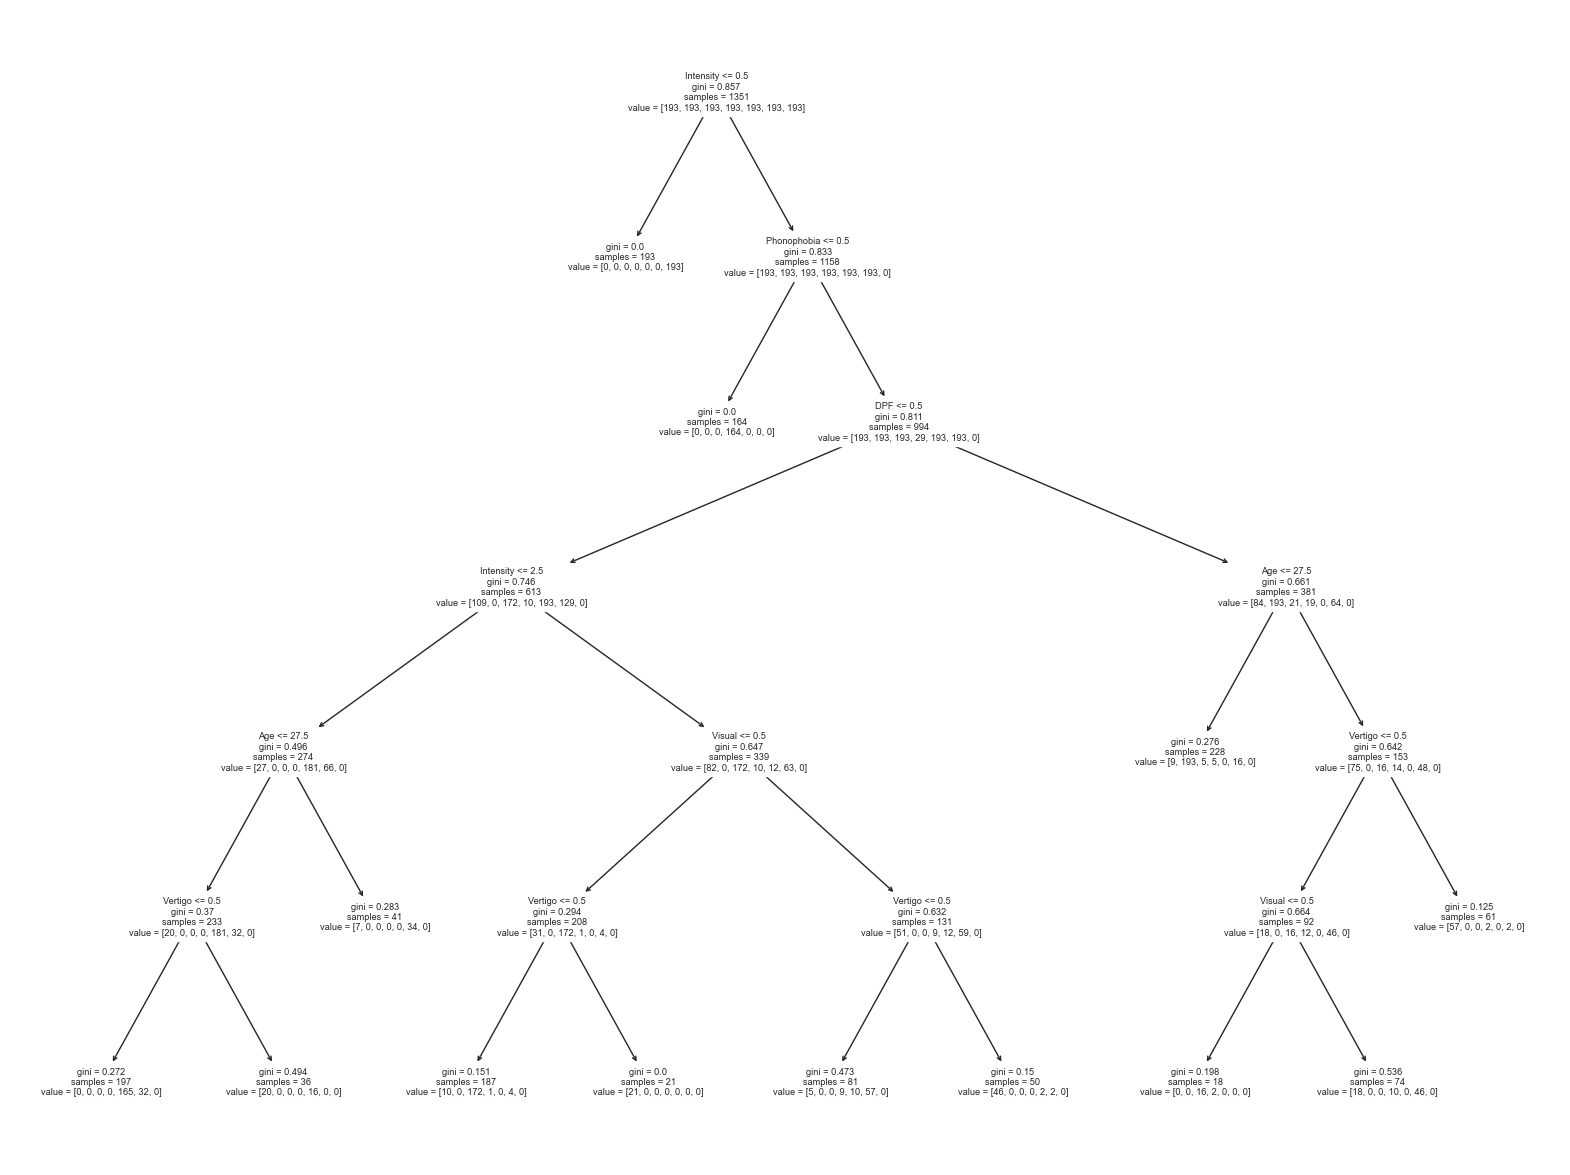

In [12]:
plt.figure(figsize=(20, 15))
plot_tree(best_dt_model, feature_names=list(X_train_resampled.columns), filled = False)

Since the prediction performance of the model after pre-pruning was not satisfactory and the depth of the tree remains relatively large, I further conducted post-pruning.

In [13]:
path = best_dt_model.cost_complexity_pruning_path(X_train_resampled, y_train_resampled)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

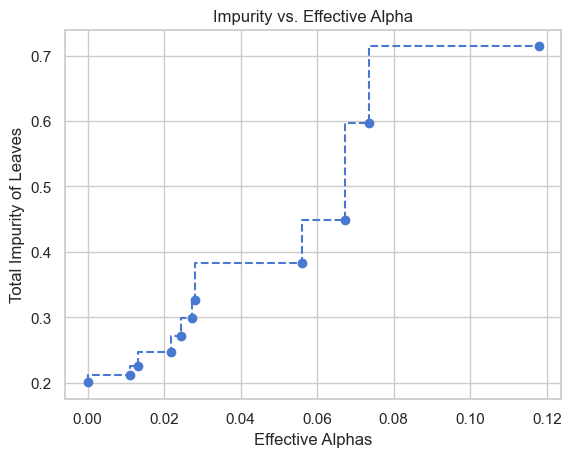

In [14]:
# display results
plt.step(ccp_alphas[:-1], impurities[:-1], '--o')
plt.title('Impurity vs. Effective Alpha')
plt.xlabel('Effective Alphas')
plt.ylabel('Total Impurity of Leaves');

In [15]:
nodes = []
for i in ccp_alphas[:-1]:
    dtree = DecisionTreeClassifier(random_state=42, ccp_alpha=i).fit(X_train_resampled, y_train_resampled)
    nodes.append(dtree.tree_.node_count)

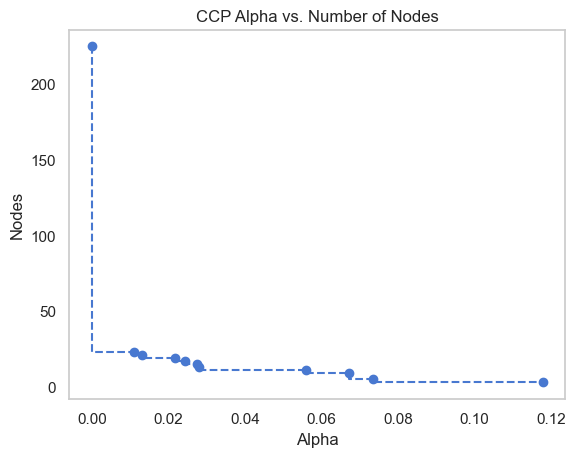

In [16]:
# display results
plt.step(ccp_alphas[:-1], nodes, '--o')
plt.xlabel('Alpha')
plt.ylabel('Nodes')
plt.title('CCP Alpha vs. Number of Nodes')
plt.grid();

In [17]:
depths = []
for i in ccp_alphas:
    dtree = DecisionTreeClassifier(random_state=42, ccp_alpha=i).fit(X_train_resampled, y_train_resampled)
    depths.append(dtree.get_depth())

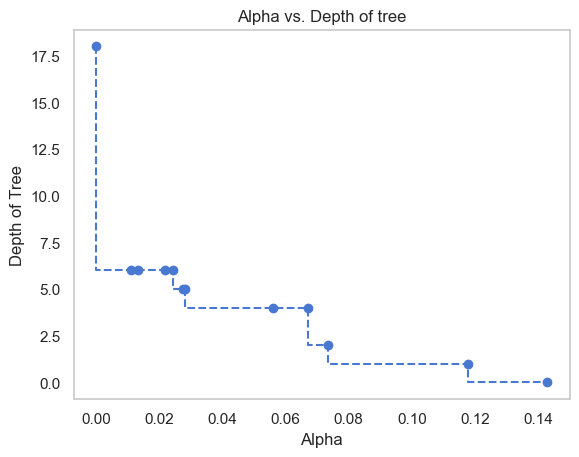

In [18]:
# display results
plt.step(ccp_alphas, depths, '--o')
plt.ylabel('Depth of Tree')
plt.xlabel('Alpha')
plt.grid()
plt.title('Alpha vs. Depth of tree');

In [19]:
train_accs = []
test_accs = []
for i in ccp_alphas[:-1]:
    dtree = DecisionTreeClassifier(random_state=42, ccp_alpha=i).fit(X_train_resampled, y_train_resampled)
    train_accs.append(dtree.score(X_train_resampled, y_train_resampled))
    test_accs.append(dtree.score(X_test, y_test))

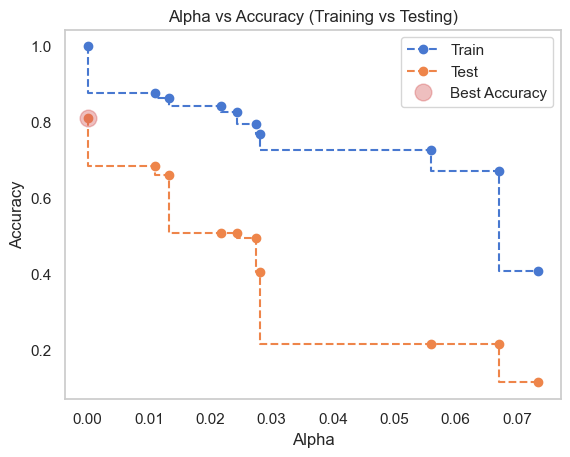

In [20]:
# display results
plt.step(ccp_alphas[:-2], train_accs[:-1], '--o', label='Train')
plt.step(ccp_alphas[:-2], test_accs[:-1], '--o', label='Test')
best_alpha = ccp_alphas[np.argmax(test_accs)]
plt.plot(best_alpha, max(test_accs), 'ro', markersize=12, alpha=0.4, label='Best Accuracy')
plt.legend()
plt.grid()
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Alpha vs Accuracy (Training vs Testing)')
plt.show()

In [21]:
best_alpha = ccp_alphas[np.argmax(test_accs)]
print(f'Best alpha: {best_alpha}')

Best alpha: 0.0


[Text(0.5696331521739131, 0.9736842105263158, 'Intensity <= 0.5\ngini = 0.857\nsamples = 1351\nvalue = [193, 193, 193, 193, 193, 193, 193]'),
 Text(0.5587635869565217, 0.9210526315789473, 'gini = 0.0\nsamples = 193\nvalue = [0, 0, 0, 0, 0, 0, 193]'),
 Text(0.5805027173913043, 0.9210526315789473, 'Phonophobia <= 0.5\ngini = 0.833\nsamples = 1158\nvalue = [193, 193, 193, 193, 193, 193, 0]'),
 Text(0.5696331521739131, 0.868421052631579, 'gini = 0.0\nsamples = 164\nvalue = [0, 0, 0, 164, 0, 0, 0]'),
 Text(0.5913722826086957, 0.868421052631579, 'DPF <= 0.5\ngini = 0.811\nsamples = 994\nvalue = [193, 193, 193, 29, 193, 193, 0]'),
 Text(0.3298233695652174, 0.8157894736842105, 'Intensity <= 2.5\ngini = 0.746\nsamples = 613\nvalue = [109, 0, 172, 10, 193, 129, 0]'),
 Text(0.24388586956521738, 0.7631578947368421, 'Age <= 27.5\ngini = 0.496\nsamples = 274\nvalue = [27, 0, 0, 0, 181, 66, 0]'),
 Text(0.19429347826086957, 0.7105263157894737, 'Vertigo <= 0.5\ngini = 0.37\nsamples = 233\nvalue = [20, 

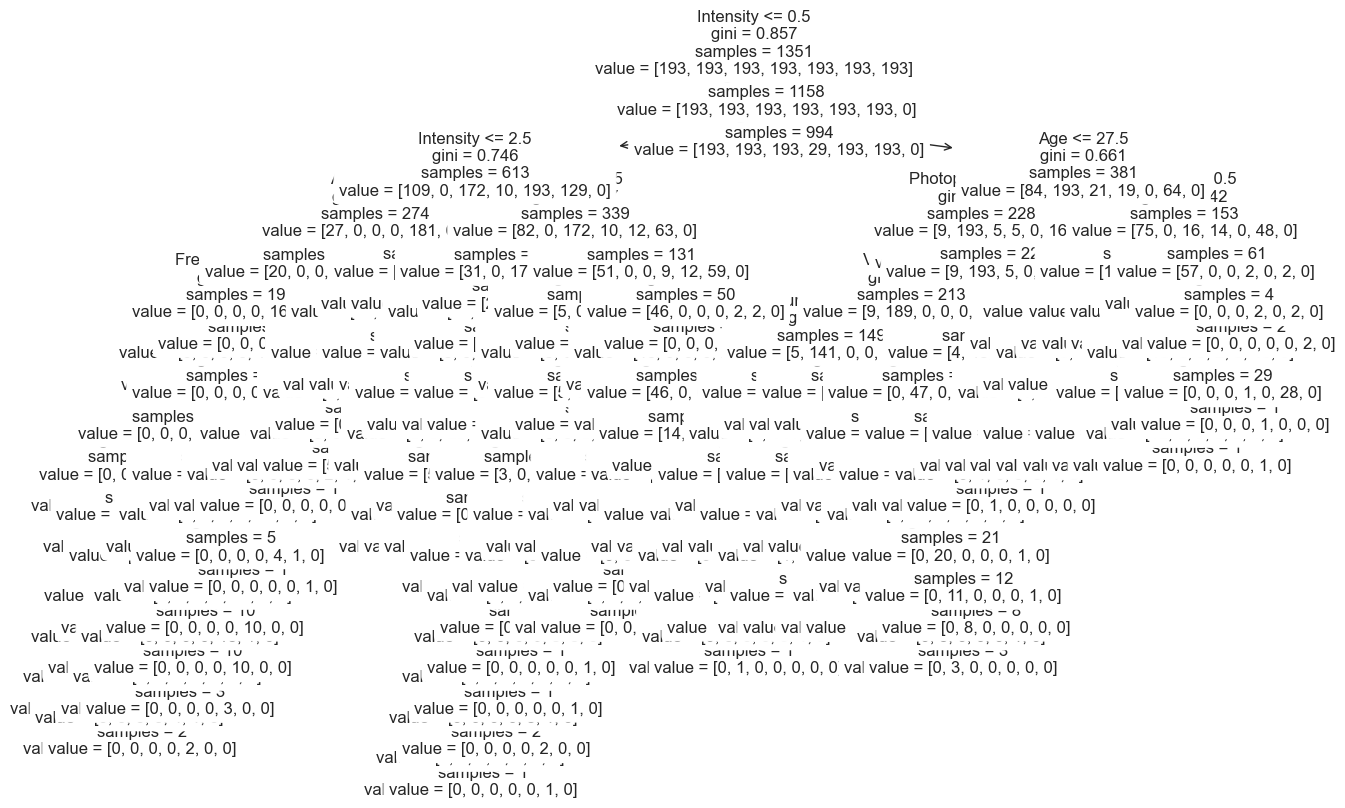

In [22]:
model_1 = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
model_1.fit(X_train_resampled, y_train_resampled)

plt.figure(figsize=(15, 10))
plot_tree(model_1, feature_names=X_train_resampled.columns, filled=False, fontsize=12, rounded=True)

In [23]:
Model_1_train_acc = model_1.score(X_train_resampled, y_train_resampled)
Model_1_test_acc =model_1.score(X_test, y_test)

print(f'Train Accuracy: {Model_1_train_acc: .2f}')
print(f'Test Accuracy: {Model_1_test_acc: .2f}')

Train Accuracy:  1.00
Test Accuracy:  0.81


When constructing this model, to ensure the authenticity of the test instances, I chose to perform oversampling only on the training set without making any adjustments to the test set. 
While this approach can help the model better learn the characteristics of the minority class, it may also be the cause of inevitable overfitting during the training process. Moreover, in the post-pruning phase, the best alpha value is still 0.0, and the model fits better without any pruning at all.

### 2.1.3 Model Analysis

In [24]:
y_pred_1 = model_1.predict(X_test)

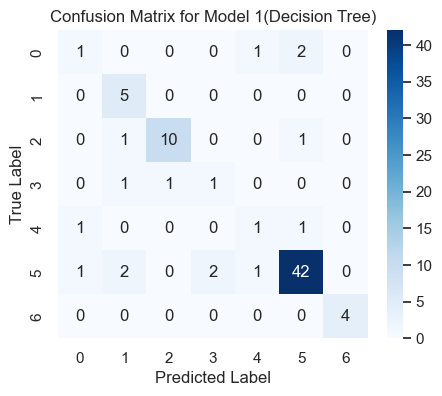

In [25]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_1)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for Model 1(Decision Tree)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [26]:
accuracy_1 = accuracy_score(y_test, y_pred_1)
precision_1 = precision_score(y_test, y_pred_1, average='weighted')
recall_1 = recall_score(y_test, y_pred_1, average='weighted')
f1_1 = f1_score(y_test, y_pred_1, average='weighted')

y_pred_prob_1 = model_1.predict_proba(X_test)
roc_auc_1 = roc_auc_score(y_test, y_pred_prob_1, multi_class='ovr')

In [27]:
print(f"Accuracy: {accuracy_1:.2f}")
print(f"Precision: {precision_1:.2f}")
print(f"Recall: {recall_1:.2f}")
print(f"F1 Score: {f1_1:.2f}")
print(f"ROC AUC: {roc_auc_1:.2f}")

Accuracy: 0.81
Precision: 0.82
Recall: 0.81
F1 Score: 0.81
ROC AUC: 0.81


Save those results in dictionaries for later comparison.

In [28]:
accuracy_dic={}
precision_dic={}
recall_dic={}
f1_dic={}
roc_auc_dic={}

accuracy_dic["Model 1"]=accuracy_1
precision_dic["Model 1"]=precision_1
recall_dic["Model 1"]=recall_1
f1_dic["Model 1"]=f1_1
roc_auc_dic["Model 1"]=roc_auc_1

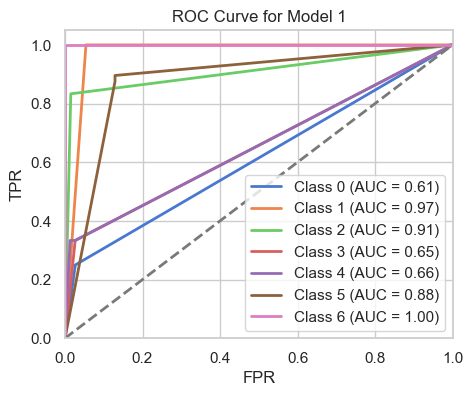

In [29]:
n_classes = 7
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
y_pred_prob_1 = model_1.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(5, 4))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Model 1')
plt.legend(loc="lower right")
plt.show()

## 2.2 Model 2: K Nearest Neighbors

### 2.2.1 Oversampling:SMOTE

In [30]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [31]:
X_train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          1351 non-null   int64
 1   Duration     1351 non-null   int64
 2   Frequency    1351 non-null   int64
 3   Location     1351 non-null   int64
 4   Intensity    1351 non-null   int64
 5   Nausea       1351 non-null   int64
 6   Vomit        1351 non-null   int64
 7   Phonophobia  1351 non-null   int64
 8   Photophobia  1351 non-null   int64
 9   Visual       1351 non-null   int64
 10  Sensory      1351 non-null   int64
 11  Dysphasia    1351 non-null   int64
 12  Dysarthria   1351 non-null   int64
 13  Vertigo      1351 non-null   int64
 14  Tinnitus     1351 non-null   int64
 15  Hypoacusis   1351 non-null   int64
 16  Diplopia     1351 non-null   int64
 17  Defect       1351 non-null   int64
 18  Conscience   1351 non-null   int64
 19  Paresthesia  1351 non-null   int64
 20  DPF     

### 2.2.2 Model Implemention(Pipeline)

In [32]:
scaler = StandardScaler()
X_train_rescaled = scaler.fit_transform(X_train_resampled)
X_test_rescaled = scaler.transform(X_test)

In [33]:
pipeline = Pipeline(steps=[
    ('knn', KNeighborsClassifier())
])

In [34]:
params = {
    'knn__n_neighbors': range(5,50,2),
    'knn__weights': ['uniform', 'distance'], 
    'knn__metric': ['euclidean', 'manhattan']
}

In [35]:
grid_search = GridSearchCV(pipeline, params, cv=10, n_jobs=-1, scoring='accuracy', verbose=1)
grid_search.fit(X_train_rescaled, y_train_resampled)

best_knn_model = grid_search.best_estimator_

grid_train_acc = grid_search.score(X_train_rescaled, y_train_resampled)
grid_test_acc = grid_search.score(X_test_rescaled, y_test)

print(f'Train Accuracy: {grid_train_acc: .2f}')
print(f'Test Accuracy: {grid_test_acc: .2f}')
print(f"Best parameter: {grid_search.best_params_}")

Fitting 10 folds for each of 92 candidates, totalling 920 fits
Train Accuracy:  1.00
Test Accuracy:  0.73
Best parameter: {'knn__metric': 'manhattan', 'knn__n_neighbors': 31, 'knn__weights': 'distance'}


In [36]:
model_2 = best_knn_model

### 2.3.3 Model A nalysis

In [37]:
y_pred_2 = model_2.predict(X_test_rescaled)

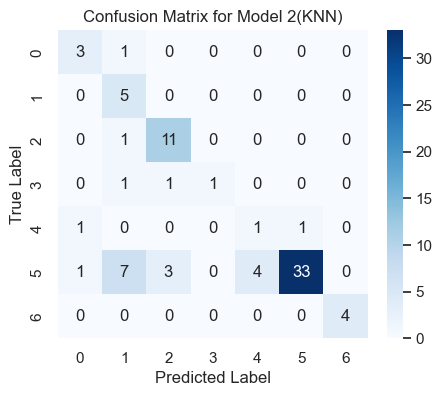

In [38]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_2)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for Model 2(KNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [39]:
accuracy_2 = accuracy_score(y_test, y_pred_2)
precision_2 = precision_score(y_test, y_pred_2, average='weighted')
recall_2 = recall_score(y_test, y_pred_2, average='weighted')
f1_2 = f1_score(y_test, y_pred_2, average='weighted')

y_pred_prob_2 = model_2.predict_proba(X_test_rescaled)
roc_auc_2 = roc_auc_score(y_test, y_pred_prob_2, multi_class='ovr')

In [40]:
print(f"Accuracy: {accuracy_2:.2f}")
print(f"Precision: {precision_2:.2f}")
print(f"Recall: {recall_2:.2f}")
print(f"F1 Score: {f1_2:.2f}")
print(f"ROC AUC: {roc_auc_2:.2f}")

Accuracy: 0.73
Precision: 0.85
Recall: 0.73
F1 Score: 0.76
ROC AUC: 0.91


Despite the use of oversampling and cross-validation (cv=10), the model's recall remains low.

In [41]:
accuracy_dic["Model 2"]=accuracy_2
precision_dic["Model 2"]=precision_2
recall_dic["Model 2"]=recall_2
f1_dic["Model 2"]=f1_2
roc_auc_dic["Model 2"]=roc_auc_2

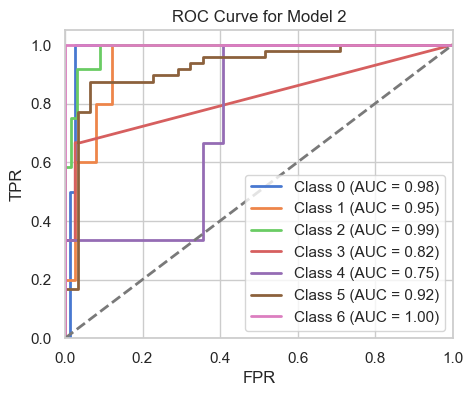

In [42]:
n_classes = 7
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
y_pred_prob_2 = model_2.predict_proba(X_test_rescaled)

fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(5, 4))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Model 2')
plt.legend(loc="lower right")
plt.show()

## 2.3 Model 3: Naive Bayes

### 2.3.1 Oversampling:SMOTE

In [43]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [44]:
X_train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          1351 non-null   int64
 1   Duration     1351 non-null   int64
 2   Frequency    1351 non-null   int64
 3   Location     1351 non-null   int64
 4   Intensity    1351 non-null   int64
 5   Nausea       1351 non-null   int64
 6   Vomit        1351 non-null   int64
 7   Phonophobia  1351 non-null   int64
 8   Photophobia  1351 non-null   int64
 9   Visual       1351 non-null   int64
 10  Sensory      1351 non-null   int64
 11  Dysphasia    1351 non-null   int64
 12  Dysarthria   1351 non-null   int64
 13  Vertigo      1351 non-null   int64
 14  Tinnitus     1351 non-null   int64
 15  Hypoacusis   1351 non-null   int64
 16  Diplopia     1351 non-null   int64
 17  Defect       1351 non-null   int64
 18  Conscience   1351 non-null   int64
 19  Paresthesia  1351 non-null   int64
 20  DPF     

### 2.3 2 Model Implemention

In [45]:
model_3 = GaussianNB()

In [46]:
model_3.fit(X_train_resampled, y_train_resampled)

GaussianNB()

### 2.3.3 Model Analysis

In [47]:
y_pred_3 = model_3.predict(X_test)

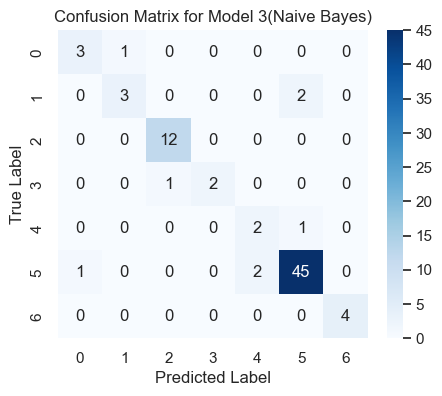

In [48]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_3)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for Model 3(Naive Bayes)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [49]:
accuracy_3 = accuracy_score(y_test, y_pred_3)
precision_3 = precision_score(y_test, y_pred_3, average='weighted')
recall_3 = recall_score(y_test, y_pred_3, average='weighted')
f1_3 = f1_score(y_test, y_pred_3, average='weighted')

y_pred_prob_3 = model_3.predict_proba(X_test)
roc_auc_3 = roc_auc_score(y_test, y_pred_prob_3, multi_class='ovr')

In [50]:
print(f"Accuracy: {accuracy_3:.2f}")
print(f"Precision: {precision_3:.2f}")
print(f"Recall: {recall_3:.2f}")
print(f"F1 Score: {f1_3:.2f}")
print(f"ROC AUC: {roc_auc_3:.2f}")

Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1 Score: 0.90
ROC AUC: 0.97


In [51]:
accuracy_dic["Model 3"]=accuracy_3
precision_dic["Model 3"]=precision_3
recall_dic["Model 3"]=recall_3
f1_dic["Model 3"]=f1_3
roc_auc_dic["Model 3"]=roc_auc_3

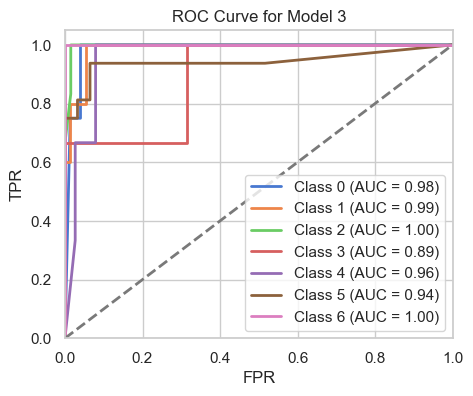

In [52]:
n_classes = 7
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
y_pred_prob_3 = model_3.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(5, 4))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_3[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Model 3')
plt.legend(loc="lower right")
plt.show()

## 2.4 Model 4: Random Forest

### 2.4.1 Model Implemention

In [53]:
X = df.drop(columns=['Type', 'Type_encoded'])
y = df['Type_encoded'] 

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [55]:
model_4 = RandomForestClassifier(random_state=42)
model_4.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 2.4.2 Model Analysis

In [56]:
y_pred_4 = model_4.predict(X_test)

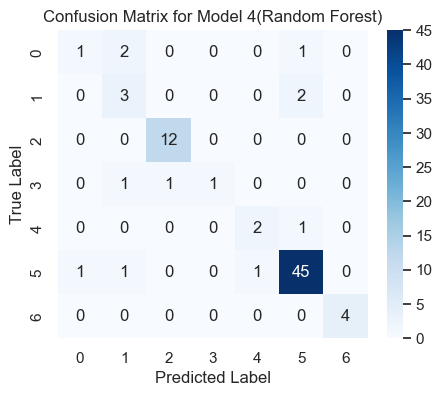

In [57]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_4)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for Model 4(Random Forest)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [58]:
accuracy_4 = accuracy_score(y_test, y_pred_4)
precision_4 = precision_score(y_test, y_pred_4, average='weighted')
recall_4 = recall_score(y_test, y_pred_4, average='weighted')
f1_4 = f1_score(y_test, y_pred_4, average='weighted')

y_pred_prob_4 = model_4.predict_proba(X_test)
roc_auc_4 = roc_auc_score(y_test, y_pred_prob_4, multi_class='ovr')

In [59]:
print(f"Accuracy: {accuracy_4:.2f}")
print(f"Precision: {precision_4:.2f}")
print(f"Recall: {recall_4:.2f}")
print(f"F1 Score: {f1_4:.2f}")
print(f"ROC AUC: {roc_auc_4:.2f}")

Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1 Score: 0.85
ROC AUC: 0.96


In [60]:
accuracy_dic["Model 4"]=accuracy_4
precision_dic["Model 4"]=precision_4
recall_dic["Model 4"]=recall_4
f1_dic["Model 4"]=f1_4
roc_auc_dic["Model 4"]=roc_auc_4

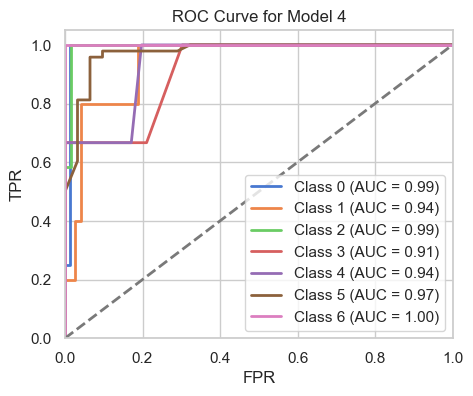

In [61]:
n_classes = 7
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
y_pred_prob_4 = model_4.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(5, 4))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_4[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Model 4')
plt.legend(loc="lower right")
plt.show()

## 2.5 Model 5: Adaboost

### 2.5.1 Model Implemention

In [62]:
base_estimator = DecisionTreeClassifier(max_depth=2, random_state=42)

In [63]:
model_5 = AdaBoostClassifier(
    base_estimator=base_estimator,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=42
)

In [64]:
model_5.fit(X_train, y_train)

D:\A\aboutAna\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=42),
                   random_state=42)

### 2.5.2 Model Analysis

In [65]:
y_pred_5 = model_5.predict(X_test)

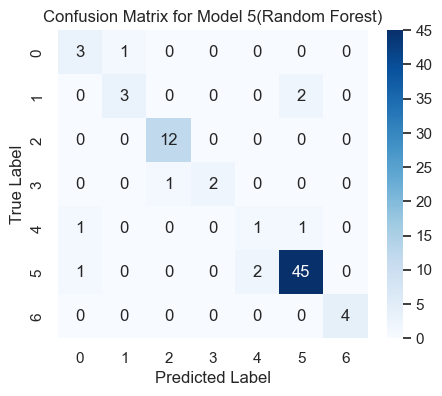

In [66]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_5)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for Model 5(Random Forest)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [67]:
accuracy_5 = accuracy_score(y_test, y_pred_5)
precision_5 = precision_score(y_test, y_pred_5, average='weighted')
recall_5 = recall_score(y_test, y_pred_5, average='weighted')
f1_5 = f1_score(y_test, y_pred_5, average='weighted')

y_pred_prob_5 = model_5.predict_proba(X_test)
roc_auc_5 = roc_auc_score(y_test, y_pred_prob_5, multi_class='ovr')

In [68]:
print(f"Accuracy: {accuracy_5:.2f}")
print(f"Precision: {precision_5:.2f}")
print(f"Recall: {recall_5:.2f}")
print(f"F1 Score: {f1_5:.2f}")
print(f"ROC AUC: {roc_auc_5:.2f}")

Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89
ROC AUC: 0.92


In [69]:
accuracy_dic["Model 5"]=accuracy_5
precision_dic["Model 5"]=precision_5
recall_dic["Model 5"]=recall_5
f1_dic["Model 5"]=f1_4
roc_auc_dic["Model 5"]=roc_auc_5

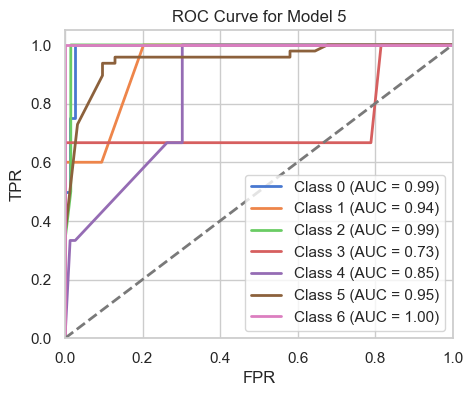

In [70]:
n_classes = 7
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))
y_pred_prob_5 = model_5.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(5, 4))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_5[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Model 5')
plt.legend(loc="lower right")
plt.show()

## 2.6 Comparison

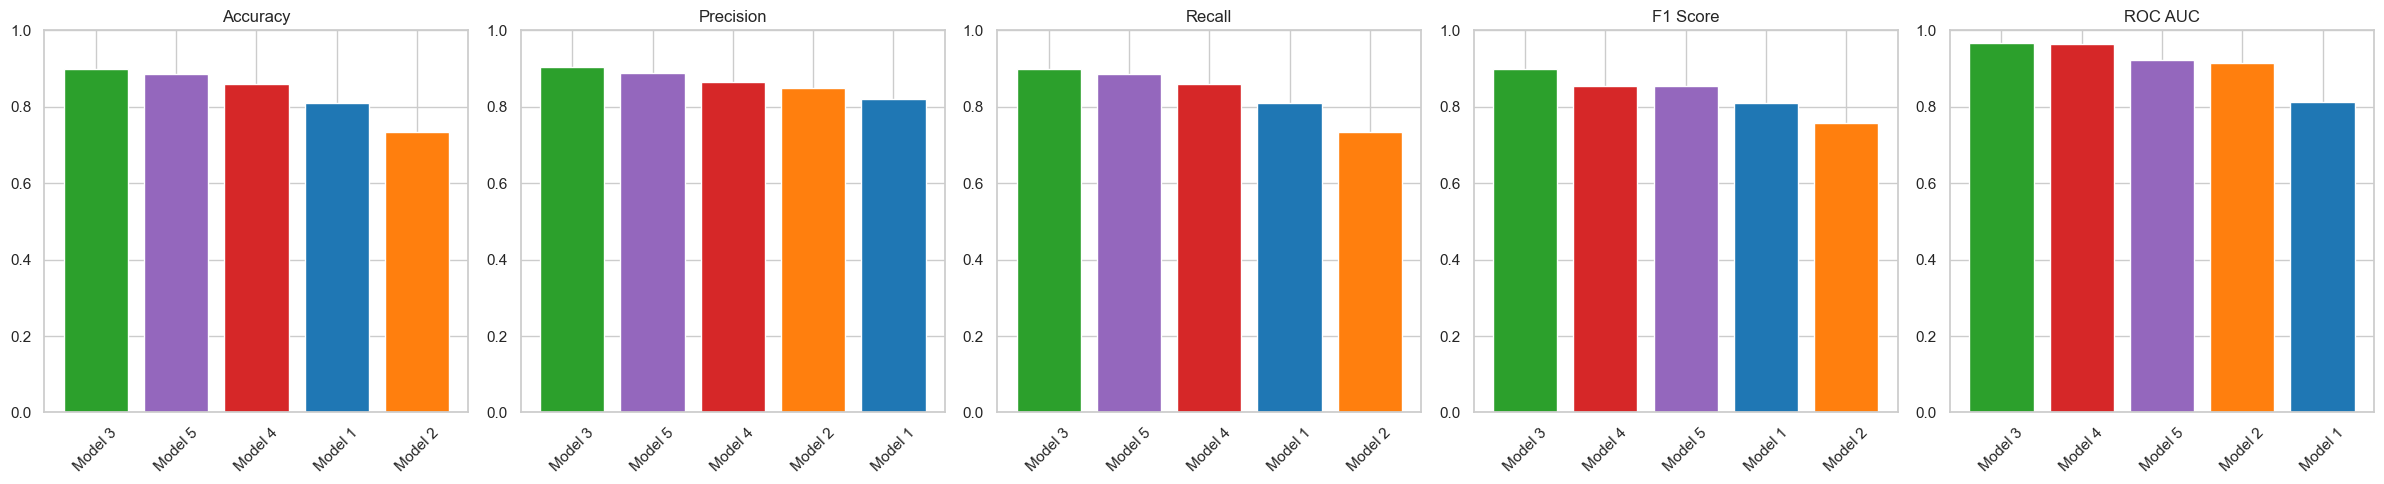

In [71]:
metrics = {
    "Accuracy": accuracy_dic,
    "Precision": precision_dic,
    "Recall": recall_dic,
    "F1 Score": f1_dic,
    "ROC AUC": roc_auc_dic,
}
model_names = list(accuracy_dic.keys())

colors = plt.cm.tab10.colors
model_to_color = {model: colors[i % len(colors)] for i, model in enumerate(model_names)}

plt.figure(figsize=(24, 5))
for i, (metric_name, metric_dict) in enumerate(metrics.items(), start=1):
    plt.subplot(1, 5, i)
    
    sorted_items = sorted(metric_dict.items(), key=lambda x: x[1], reverse=True)
    models = [x[0] for x in sorted_items]
    values = [x[1] for x in sorted_items]
    bar_colors = [model_to_color[model] for model in models]
    
    plt.bar(models, values, color=bar_colors)
    plt.ylim(0, 1)
    plt.title(metric_name)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [72]:
weights = {
    "Accuracy": 0.2,
    "Precision": 0.2,
    "Recall": 0.2,
    "F1 Score": 0.2,
    "ROC AUC": 0.2,
}

total_scores = {model: 0 for model in accuracy_dic.keys()}

for metric_name, metric_dict in metrics.items():
    for model, value in metric_dict.items():
        total_scores[model] += weights[metric_name] * value

sorted_scores = sorted(total_scores.items(), key=lambda x: x[1], reverse=True)
best_model, best_score = sorted_scores[0]

for model, score in sorted_scores:
    print(f"{model}: {score:.4f}")

print(f"\nBest Model：{best_model}（Weighted Score = {best_score:.4f}）")

Model 3: 0.9130
Model 5: 0.8872
Model 4: 0.8807
Model 1: 0.8128
Model 2: 0.7978

Best Model：Model 3（Weighted Score = 0.9130）


The visualization of various metrics and the weighted scoring results show that __Model 3 (KNN)__ performs the best overall. This superiority mainly comes from its excellent adaptability to high-dimensional features, a more stable voting mechanism under balanced data processed by SMOTE, and outstanding generalization ability after normalization and parameter tuning. Compared to other models, KNN demonstrates stronger robustness and classification accuracy in the current task.

## 2.7 Stacking(Logistic)

In [81]:
estimators = [
    ('m1', model_1),
    ('m2', model_2),
    ('m3', model_3),
    ('m4', model_4),
    ('m5', model_5)
]

meta_model = LogisticRegression()

stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_model, cv=5)
stacking_model.fit(X_train, y_train)

D:\A\aboutAna\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\A\aboutAna\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\A\aboutAna\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\A\aboutAna\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\A\aboutAna\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
D:\A\aboutAna\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estima

StackingClassifier(cv=5,
                   estimators=[('m1', DecisionTreeClassifier(random_state=42)),
                               ('m2',
                                Pipeline(steps=[('knn',
                                                 KNeighborsClassifier(metric='manhattan',
                                                                      n_neighbors=31,
                                                                      weights='distance'))])),
                               ('m3', GaussianNB()),
                               ('m4', RandomForestClassifier(random_state=42)),
                               ('m5',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                                         random_state=42),
                                                   random_state=42))],
                   final_estimator=LogisticRegression())

y_pred_stacking = stacking_model.predict(X_test)

In [83]:
accuracy_s = accuracy_score(y_test, y_pred_stacking)
precision_s = precision_score(y_test,y_pred_stacking, average='weighted')
recall_s = recall_score(y_test, y_pred_stacking, average='weighted')
f1_s = f1_score(y_test, y_pred_stacking, average='weighted')

y_pred_prob_s = stacking_model.predict_proba(X_test)
roc_auc_s = roc_auc_score(y_test, y_pred_prob_s, multi_class='ovr')

In [84]:
print(f"Accuracy: {accuracy_s:.2f}")
print(f"Precision: {precision_s:.2f}")
print(f"Recall: {recall_s:.2f}")
print(f"F1 Score: {f1_s:.2f}")
print(f"ROC AUC: {roc_auc_s:.2f}")

Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89
ROC AUC: 0.96


Despite everything, the final performance still falls short of the KNN model.

And the prediction results trained on data without oversampling are noticeably more accurate.